## Nama: Farhan Riyandi

## Email: farhanriyandi20@gmail.com

## ID Dicoding: farhan_riyandi_uyhY



Dataset ini diambil dari: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install jcopml

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.4 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.2.4-py2.py3-none-any.whl size=42429 sha256=3360b47ff575df0a65a5f25d6d1850b09e8935cb7917eaeddd372d167f1c9b01
  Stored in directory: /root/.cache/pip/wheels/60/8e/5c/369ea57808ee92f880e0ed18b86004a0d469e9fcdee1b867d7
Successfully built jcopml


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Terapan/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Deskripsi Variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Dari output terlihat bahwa:

Terdapat 12 kolom dengan tipe object, yaitu: hotel, arrival_date_month, meal, country, market_segment, distribution_channel, reserved_room_type assigned_room_type, customer_type, reservation_status, reservation_status_date. Kolom ini merupakan categorical features (fitur non-numerik).

Terdapat 4 kolom numerik dengan tipe data float64 yaitu: children, agent, company, adr.

Terdapat 16 kolom numerik dengan tipe data int64, yaitu: is_canceled, lead_time, arrival_date_year,
       arrival_date_week_number, arrival_date_day_of_month,
       stays_in_weekend_nights, stays_in_week_nights, adults, babies,
       is_repeated_guest, previous_cancellations,
       previous_bookings_not_canceled, booking_changes,
       days_in_waiting_list, required_car_parking_spaces,
       total_of_special_requests.

perlu diketahui is_canceled adalah target atau label dalam pelatihan model ini.

Fitur reservation_status memiliki nilai yang sama dengan target yaitu is_canceled. Maka dari itu diputuskan untuk menghapus fitur tersebut

In [ ]:
df.drop(columns=['reservation_status'], inplace=True)

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Begitu banyak data yang missing value pada kolom company. dan Maka dari itu diputuskan untuk menghapus kedua fitur tersebut. teruntuk data country akan diisi oleh modus dan agent dan children akan diisi oleh median.

In [ ]:
df.drop(columns=['company'], inplace=True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,0,Transient,98.0,0,1,2015-07-03


# Menangani Missing value

In [ ]:
# Mengisi missing value
df['country'] = df['country'].fillna(df['country'].mode().iloc[0])
df['agent'] = df['agent'].fillna(df['agent'].median())
df['children'] = df['children'].fillna(df['children'].median())
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,14.0,0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,14.0,0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,14.0,0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,0,Transient,98.0,0,1,2015-07-03


In [ ]:
# mengecek kembali missing value
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status_date'],
      dtype='object')

In [ ]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

0    62.958372
1    37.041628
Name: is_canceled, dtype: float64


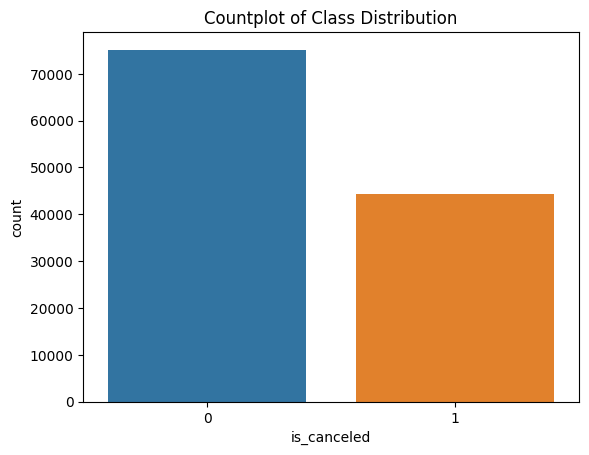

In [ ]:
class_distribution = df['is_canceled'].value_counts(normalize=True) * 100

# Outputkan persentase setiap kelas
print(class_distribution)
sns.countplot(x='is_canceled', data=df)
plt.title('Countplot of Class Distribution')
plt.show()

# Data Preparation

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Pilih kolom dengan tipe data objek
obj_columns = df.select_dtypes(include=['object']).columns

# Gunakan LabelEncoder untuk setiap kolom objek
label_encoder = LabelEncoder()
for col in obj_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='is_canceled')
y = df.is_canceled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((95512, 29), (23878, 29), (95512,), (23878,))

# Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.tuning.space import Integer, Real
from jcopml.feature_importance import mean_score_decrease
from sklearn.pipeline import Pipeline

### Random Forest

In [ ]:
from jcopml.plot import plot_confusion_matrix, plot_classification_report, plot_roc_curve

In [ ]:
# parameter yang dituning
gsp.rf_params

{'algo__n_estimators': [100, 150, 200],
 'algo__max_depth': [20, 50, 80],
 'algo__max_features': [0.3, 0.6, 0.8],
 'algo__min_samples_leaf': [1, 5, 10]}

In [ ]:
pipeline = Pipeline([
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

model1 = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose=1)
model1.fit(X_train, y_train)

print(model1.best_params_)
print(model1.score(X_train, y_train), model1.best_score_, model1.score(X_test, y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'algo__max_depth': 50, 'algo__max_features': 0.8, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 150}
1.0 0.9555971910358196 0.9631878716810454


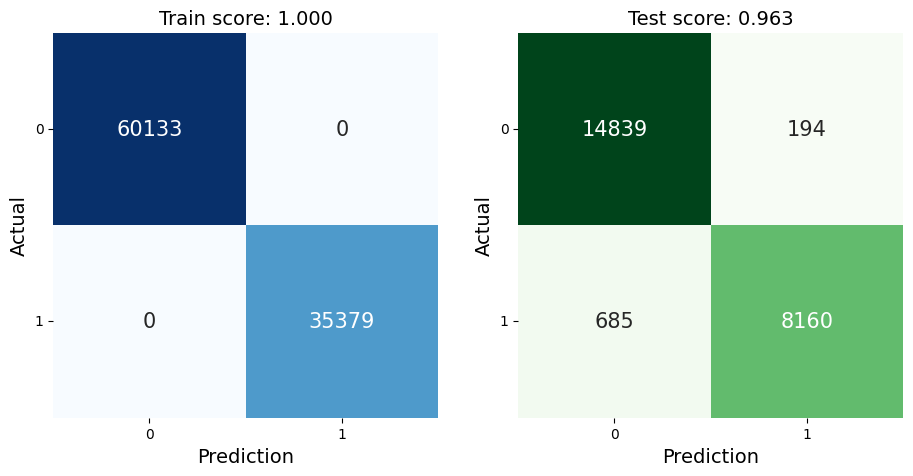

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model1)

In [ ]:
plot_classification_report(X_train, y_train, X_test, y_test, model1, report=True)

Train report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60133
           1       1.00      1.00      1.00     35379

    accuracy                           1.00     95512
   macro avg       1.00      1.00      1.00     95512
weighted avg       1.00      1.00      1.00     95512


Test report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     15033
           1       0.98      0.92      0.95      8845

    accuracy                           0.96     23878
   macro avg       0.97      0.95      0.96     23878
weighted avg       0.96      0.96      0.96     23878



In [ ]:
from jcopml.feature_importance import mean_score_decrease

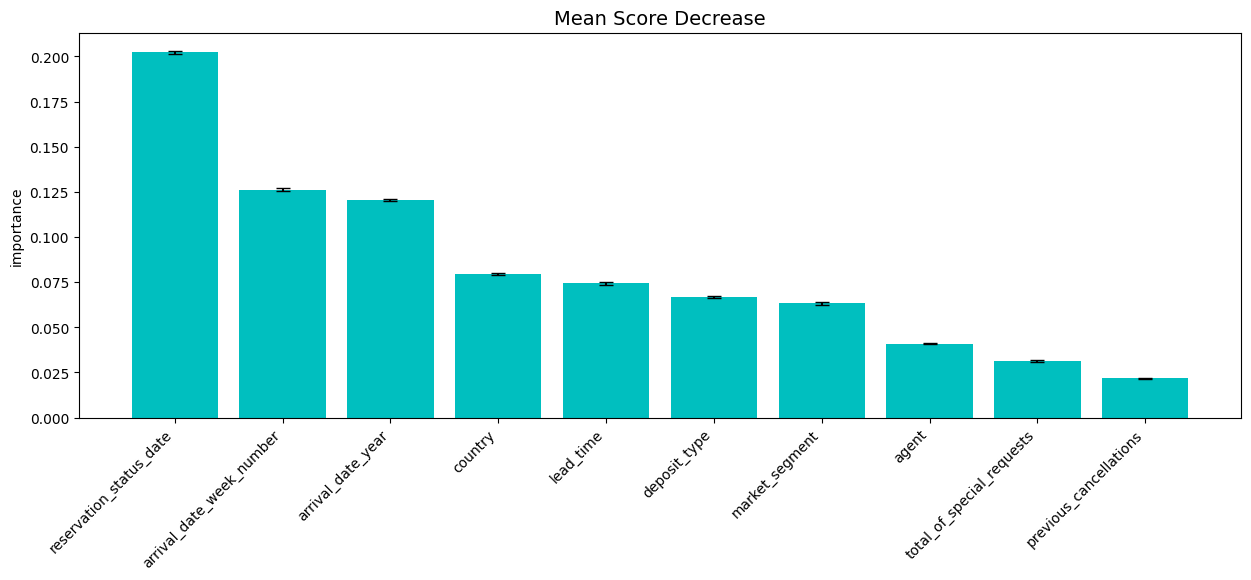

In [ ]:
df_imp = mean_score_decrease(X_train, y_train, model1, plot=True, topk=10)

Phase 2

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ["reservation_status_date", "arrival_date_week_number", "arrival_date_year"])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(n_jobs=-1, random_state=42))
])

model2 = GridSearchCV(pipeline, gsp.rf_params, cv=3, n_jobs=-1, verbose=1)
model2.fit(X_train, y_train)

print(model2.best_params_)
print(model2.score(X_train, y_train), model2.best_score_, model2.score(X_test, y_test))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'algo__max_depth': 20, 'algo__max_features': 0.8, 'algo__min_samples_leaf': 1, 'algo__n_estimators': 200}
0.9727678197503978 0.9714171988530457 0.9723176145405813


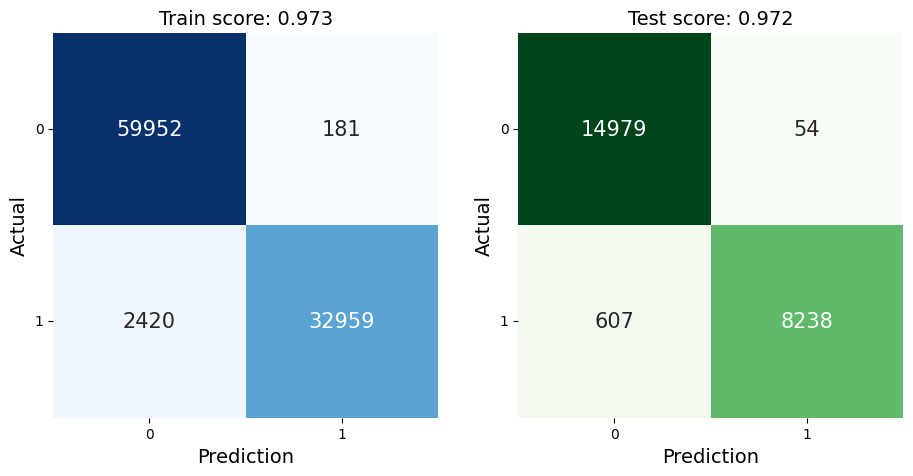

In [ ]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model2)

In [ ]:
plot_classification_report(X_train, y_train, X_test, y_test, model2, report=True)

Train report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     60133
           1       0.99      0.93      0.96     35379

    accuracy                           0.97     95512
   macro avg       0.98      0.96      0.97     95512
weighted avg       0.97      0.97      0.97     95512


Test report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     15033
           1       0.99      0.93      0.96      8845

    accuracy                           0.97     23878
   macro avg       0.98      0.96      0.97     23878
weighted avg       0.97      0.97      0.97     23878

